# 비선형 모형

- 비선형 최소 제곱, 스플라인, 의사결정 나무, 랜덤포레스트, 일반화 가법 모형(GAM)

## 스플라인

- 변수 x를 변형시켜 만들어진 N개의 함수들의 선형 조합으로 만들어지는 함수
- 평활 파라미터 람다가 작으면 울퉁불퉁한 평활 곡선이 되고, 크면 매끄러운 곡선이 된다

In [1]:
data(diamonds, package="ggplot2")

In [2]:
diaSpline1 <- smooth.spline(x=diamonds$carat, y=diamonds$price)

In [4]:
diaSpline2 <- smooth.spline(x=diamonds$carat, y=diamonds$price, df=2)

In [5]:
diaSpline3 <- smooth.spline(x=diamonds$carat, y=diamonds$price, df=10)

In [6]:
diaSpline4 <- smooth.spline(x=diamonds$carat, y=diamonds$price, df=20)

In [7]:
diaSpline5 <- smooth.spline(x=diamonds$carat, y=diamonds$price, df=50)

In [8]:
diaSpline6 <- smooth.spline(x=diamonds$carat, y=diamonds$price, df=100)

- 자유도를 낮추면 직선에 가깝게 되고, 자유도를 높이면 곡선 형태를 보인다

In [9]:
get.spline.info <- function(object){
    data.frame(x=object$x, y=object$y, df=object$df)
}

In [10]:
library(plyr)

In [11]:
library(ggplot2)

In [12]:
splineDF <- ldply(list(diaSpline1, diaSpline2, diaSpline3, diaSpline4, diaSpline5, diaSpline6), get.spline.info)

In [13]:
head(splineDF)

x,y,df
0.20,361.9112,101.9053
0.21,397.1761,101.9053
0.22,437.9095,101.9053
0.23,479.9756,101.9053
0.24,517.0467,101.9053
0.25,542.2470,101.9053


In [15]:
g <- ggplot(diamonds, aes(x=carat, y=price)) + geom_point()

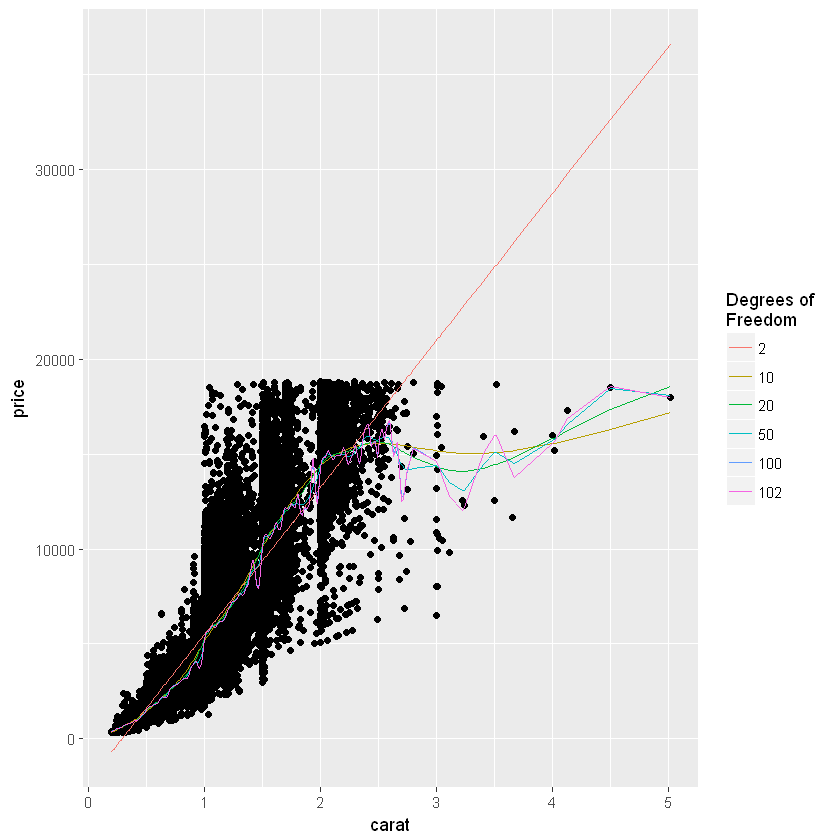

In [17]:
g + geom_line(data=splineDF,
             aes(x=x, y=y, color=factor(round(df,0)), group=df)) +
scale_color_discrete("Degrees of \nFreedom")

- 기저 스플라인(Basis Spline) : 원래의 예측 변수의 변형값에 기초해 새로운 예측 변수를 만든다.
- 가장 많이 사용되는 기저 스플라인 방법은 자연 3차 스플라인

In [19]:
library(splines)
head(ns(diamonds$carat, df=1))

1
0.00500073
0.00166691
0.00500073
0.01500219
0.01833601
0.00666764


In [20]:
head(ns(diamonds$carat, df=2))

1,2
0.013777685,-0.007265289
0.004593275,-0.002422504
0.013777685,-0.007265289
0.041275287,-0.021735857
0.050408348,-0.026525299
0.018367750,-0.009684459


In [21]:
head(ns(diamonds$carat, df=3))

1,2,3
-0.03025012,0.06432178,-0.03404826
-0.01010308,0.02146773,-0.01136379
-0.03025012,0.06432178,-0.03404826
-0.08915435,0.19076693,-0.10098109
-0.10788271,0.23166685,-0.12263116
-0.04026453,0.08566738,-0.04534740


In [22]:
head(ns(diamonds$carat, df=4))

1,2,3,4
3.214286e-04,-0.04811737,0.10035562,-0.05223825
1.190476e-05,-0.01611797,0.03361632,-0.01749835
3.214286e-04,-0.04811737,0.10035562,-0.05223825
8.678571e-03,-0.13796549,0.28774667,-0.14978118
1.584524e-02,-0.16428790,0.34264579,-0.17835789
7.619048e-04,-0.06388053,0.13323194,-0.06935141


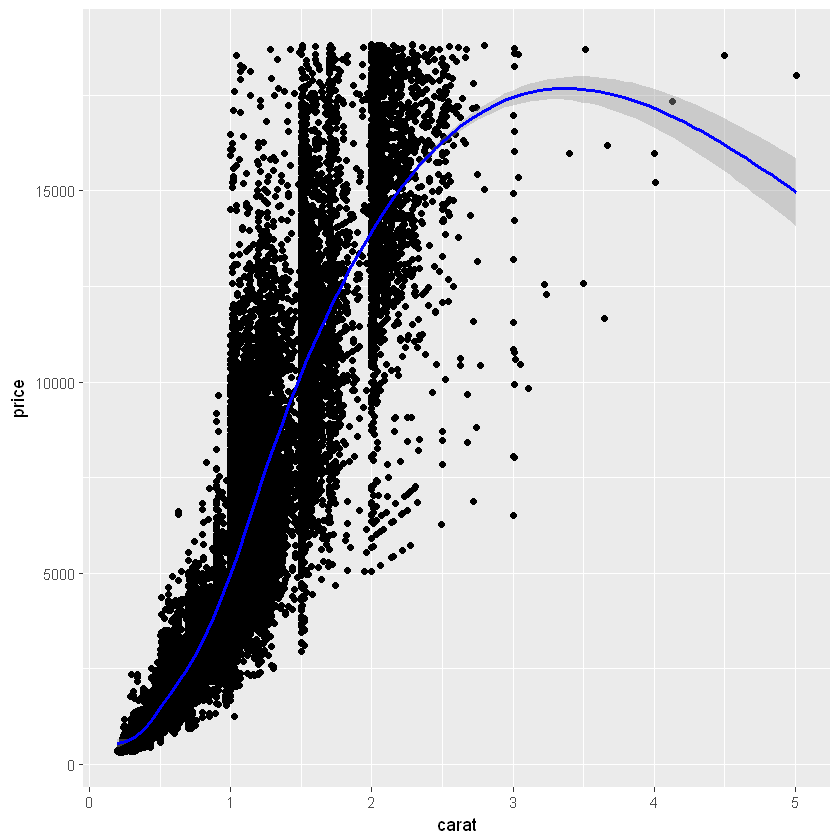

In [23]:
g + stat_smooth(method="lm", formula = y~ ns(x, 6), color = "blue") # 6개의 노트를 가진 스플라인

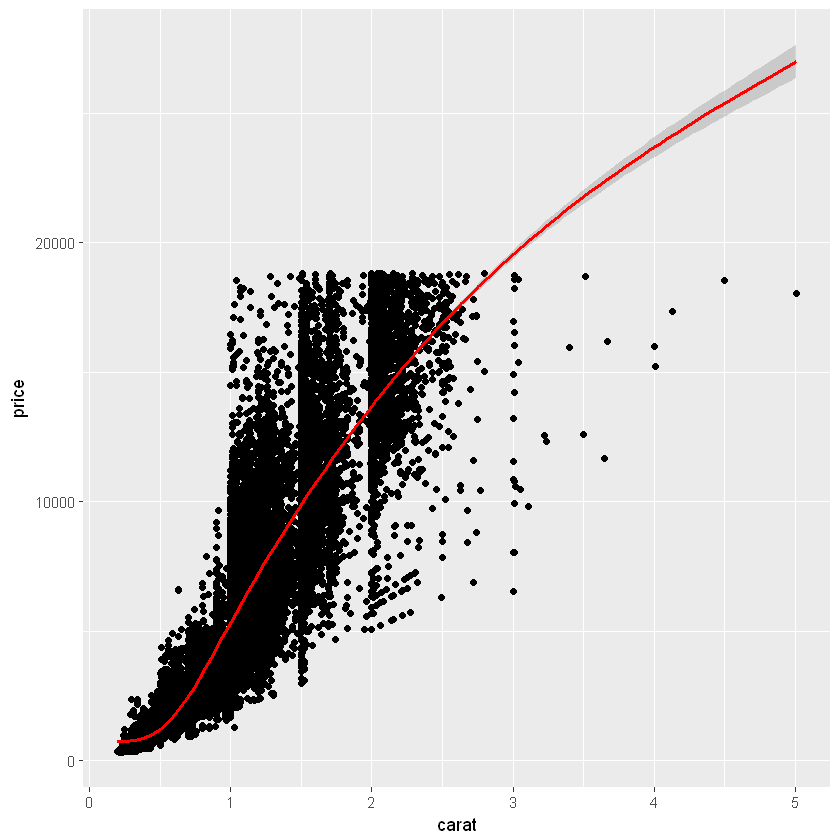

In [24]:
g + stat_smooth(method="lm", formula = y~ ns(x, 3), color = "red") # 3개의 노트를 가진 스플라인

## 3. 일반화 가법 모형(Generalized Additive Models, GAM)

In [26]:
creditNames <- c("Checking", "Duration", "CreditHistory", "Purpose",
                "CreditAmount", "Savings" ,"Employment",
                "InstallmentRate", "GenderMarital", "OtherDebtors",
                "YearsAtResidence", "RealEstate" ,"Age",
                "OtherInstallment", "Housing", "ExistingCredits",
                "Job", "NumLiable", "Phone", "Foreign", "Credit")

In [32]:
credit <- read.csv("C:/Users/student/Downloads/GermanData.csv", sep= ",", header = FALSE,
                    col.names = creditNames, stringsAsFactors = FALSE)

In [33]:
head(credit)

Checking,Duration,CreditHistory,Purpose,CreditAmount,Savings,Employment,InstallmentRate,GenderMarital,OtherDebtors,...,RealEstate,Age,OtherInstallment,Housing,ExistingCredits,Job,NumLiable,Phone,Foreign,Credit
A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [34]:
# 변환하기 전

head(credit[, c("CreditHistory", "Purpose", "Employment", "Credit")])

CreditHistory,Purpose,Employment,Credit
A34,A43,A75,1
A32,A43,A73,2
A34,A46,A74,1
A32,A42,A74,1
A33,A40,A73,2
A32,A46,A73,1


In [35]:
creditHistory <- c(A30="All Paid", A31="All Paid This Bank",
                  A32="Up To Date", A33="Late Payment",
                  A34="Critical Account")

In [36]:
purpose <- c(A40="car(new)", A41 ="car(used)",
            A42="furniture/equipment", A43="radio/television",
            A44="domestic appliances", A45="repairs",
            A46="education",
            A47="(vacation - does not exist?)", A48="retraining",
            A49="business", A410="others")

In [37]:
employment <- c(A71 = "unemployed", A72="<1 year", A73="1-4 years",
               A74="4-7 years", A75=">=7 years")

In [38]:
credit$CreditHistory <- creditHistory[credit$CreditHistory]

In [39]:
credit$Purpose <- purpose[credit$Purpose]

In [40]:
credit$Employment <- employment[credit$Employment]

In [41]:
# 신용을 좋음/나쁨으로 표시

credit$Credit <- ifelse(credit$Credit == 1, "Good" , "Bad")

In [42]:
# 신용도 좋음을 베이스 레벨로 설정

credit$Credit <- factor(credit$Credit, levels=c("Good", "Bad"))

In [43]:
# 변환한 이후

head(credit[,c("CreditHistory", "Purpose", "Employment", "Credit")])

CreditHistory,Purpose,Employment,Credit
Critical Account,radio/television,>=7 years,Good
Up To Date,radio/television,1-4 years,Bad
Critical Account,education,4-7 years,Good
Up To Date,furniture/equipment,4-7 years,Good
Late Payment,car(new),1-4 years,Bad
Up To Date,education,1-4 years,Good


In [44]:
library(useful)

- 변수들 간에 뚜렷한 선형 관계가 없기 때문에 GAM 방법이 적당할 수 있다.

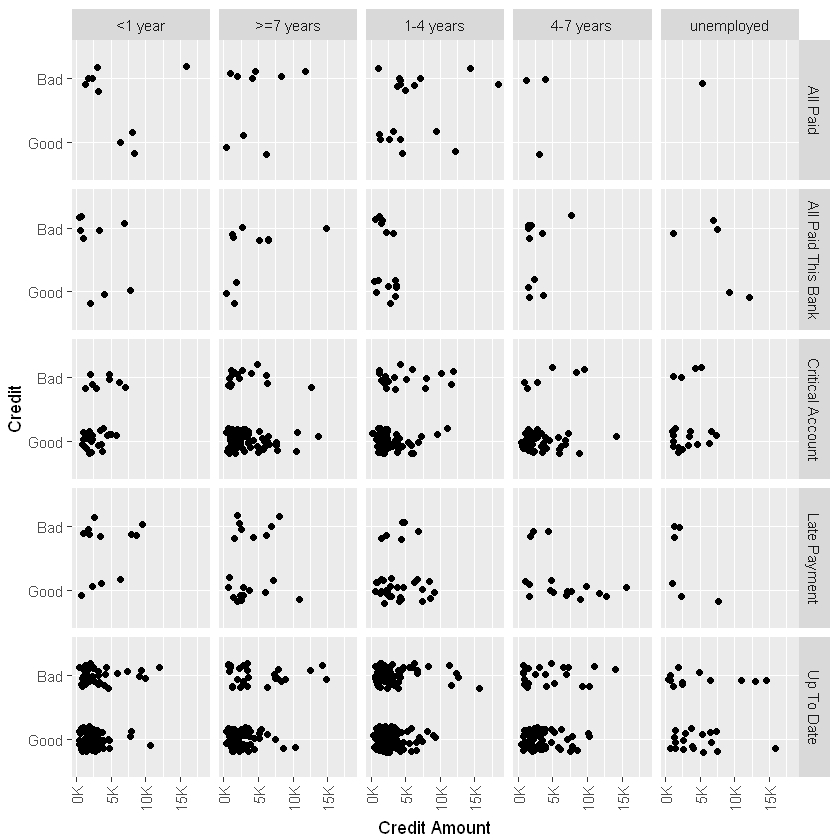

In [46]:
ggplot(credit, aes(x=CreditAmount, y=Credit))+
geom_jitter(position = position_jitter(height = .2))+
facet_grid(CreditHistory ~ Employment)+
xlab("Credit Amount")+
theme(axis.text.x=element_text(angle=90, hjust=1, vjust=.5))+
scale_x_continuous(labels=multiple)

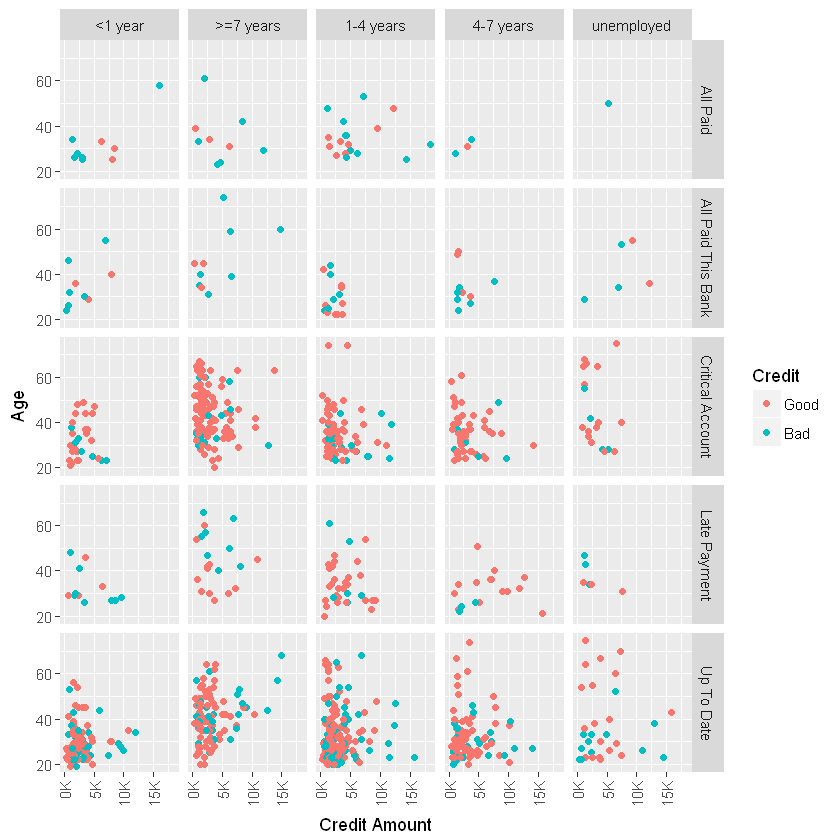

In [47]:
ggplot(credit, aes(x=CreditAmount, y=Age))+
geom_point(aes(color=Credit))+
facet_grid(CreditHistory ~ Employment) +
xlab("Credit Amount")+
theme(axis.text.x=element_text(angle=90, hjust=1, vjust=.5))+
scale_x_continuous(labels=multiple)

In [48]:
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-22. For overview type 'help("mgcv-package")'.


In [49]:
creditGam <- gam(Credit ~ te(CreditAmount) + s(Age) + CreditHistory + Employment,
                data=credit, family = binomial(link="logit"))

In [50]:
summary(creditGam)


Family: binomial 
Link function: logit 

Formula:
Credit ~ te(CreditAmount) + s(Age) + CreditHistory + Employment

Parametric coefficients:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      0.662840   0.372377   1.780  0.07507 .  
CreditHistoryAll Paid This Bank  0.008412   0.453267   0.019  0.98519    
CreditHistoryCritical Account   -1.809046   0.376326  -4.807 1.53e-06 ***
CreditHistoryLate Payment       -1.136008   0.412776  -2.752  0.00592 ** 
CreditHistoryUp To Date         -1.104274   0.355208  -3.109  0.00188 ** 
Employment>=7 years             -0.388518   0.240343  -1.617  0.10598    
Employment1-4 years             -0.380981   0.204292  -1.865  0.06220 .  
Employment4-7 years             -0.820943   0.252069  -3.257  0.00113 ** 
Employmentunemployed            -0.092727   0.334975  -0.277  0.78192    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
         

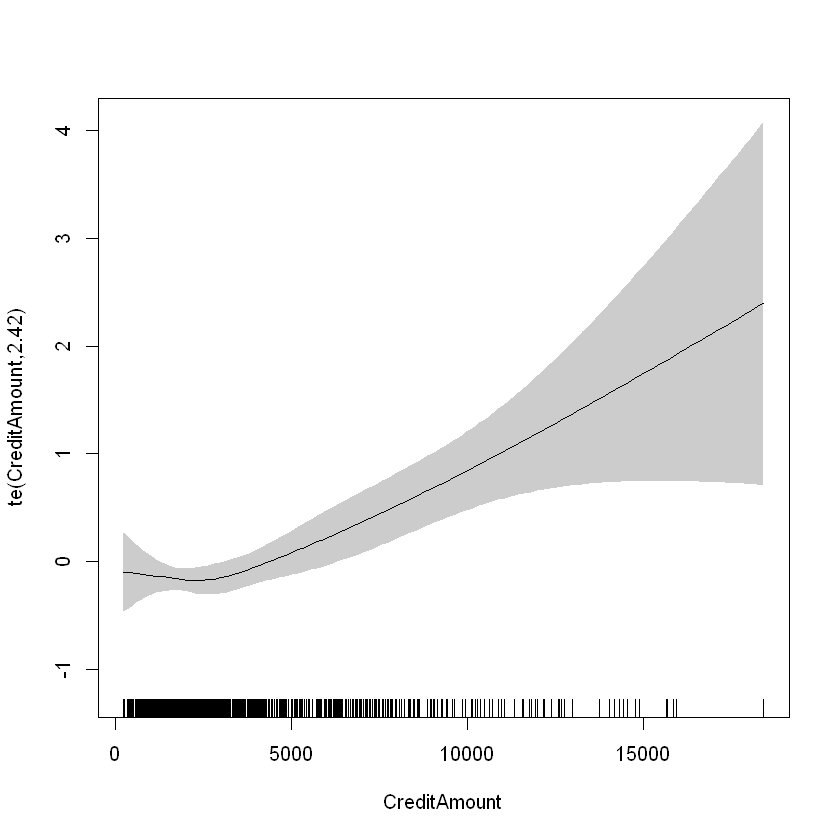

In [51]:
plot(creditGam, select=1, se=TRUE, shade=TRUE)

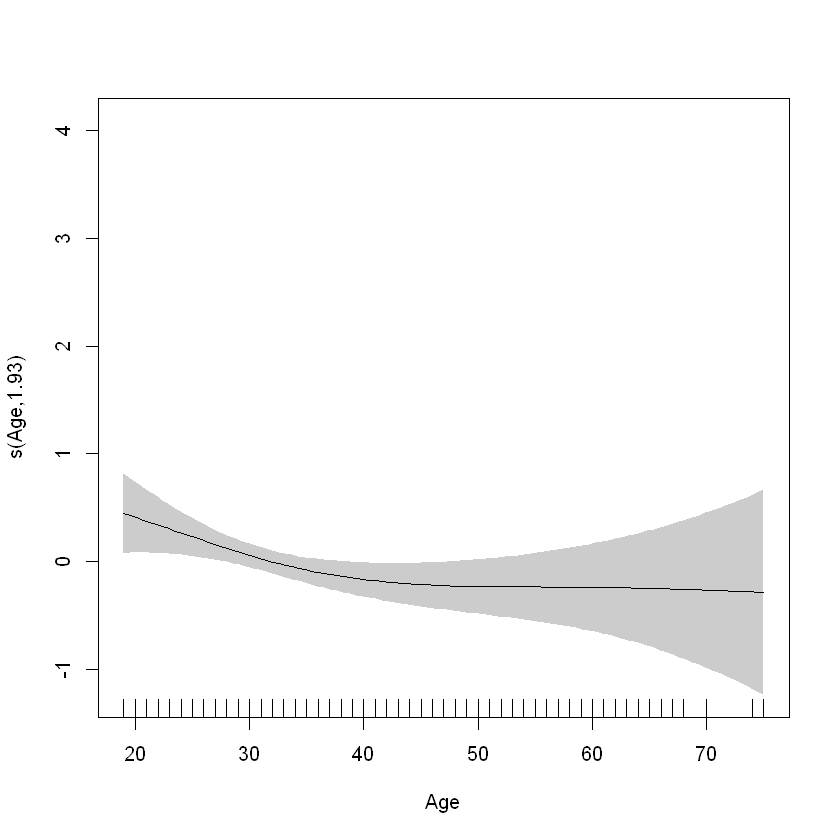

In [52]:
plot(creditGam, select=2 , se = TRUE, shade=TRUE)

## 4. 의사결정나무

- 예측 변수를 재귀적인 방법으로 이분 하는 방식
- 회귀와 분류에 모두 사용 가능하다
- 해석하기 편리하고 데이터가 잘 적합된다
- 분산이 큰 경우 과대 적합 때문에 불안정해지는 경향이 있다.

In [53]:
library(rpart)

In [54]:
creditTree <- rpart(Credit ~ CreditAmount + Age + CreditHistory + Employment, data=credit)

In [55]:
creditTree

n= 1000 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 1000 300 Good (0.7000000 0.3000000)  
   2) CreditHistory=Critical Account,Late Payment,Up To Date 911 247 Good (0.7288694 0.2711306)  
     4) CreditAmount< 7760.5 846 211 Good (0.7505910 0.2494090) *
     5) CreditAmount>=7760.5 65  29 Bad (0.4461538 0.5538462)  
      10) Age>=29.5 40  17 Good (0.5750000 0.4250000)  
        20) Age< 38.5 19   4 Good (0.7894737 0.2105263) *
        21) Age>=38.5 21   8 Bad (0.3809524 0.6190476) *
      11) Age< 29.5 25   6 Bad (0.2400000 0.7600000) *
   3) CreditHistory=All Paid,All Paid This Bank 89  36 Bad (0.4044944 0.5955056) *

In [57]:
install.packages("rpart.plot")
library(rpart.plot)

package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpiuElyv\downloaded_packages


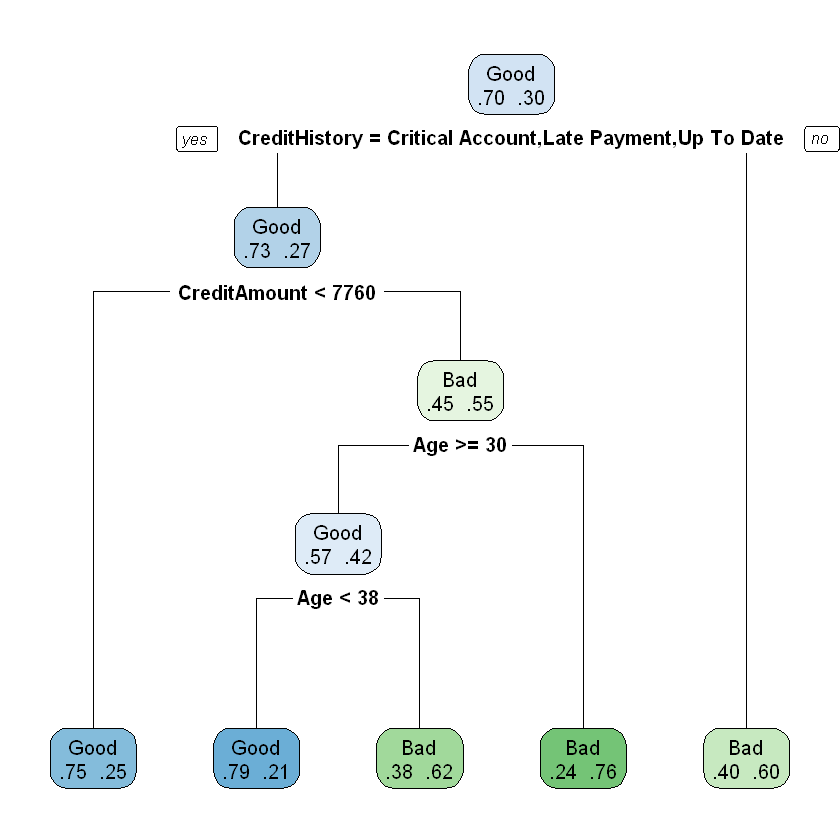

In [58]:
rpart.plot(creditTree, extra=4)

## 5. 부스팅 의사결정 나무

- 하나의 모형을 연속적인 적합 과정을 거치면서 천천히 학습 시키는 것
- 모형의 성능을 높이는 관찰값들의 가중 값은 낮추고, 성능을 높이지 못하는 관찰값들의 가중 값은 높이며 새로운 모형을 적합
- 이러한 작은 모형들이 눚거돼 최종 모형이 완성된다.
- gbm, xgboost가 최근 인기가 높다

In [59]:
library(useful)

In [60]:
creditFormula <- Credit ~ CreditHistory + Purpose + Employment + Duration + Age + CreditAmount - 1

In [61]:
creditX <- build.x(creditFormula, data=credit, contrasts=FALSE)
creditY <- build.y(creditFormula, data=credit)

In [62]:
# 논리형 벡터를 [0, 1]로 변환한다.
creditY <- as.integer(relevel(creditY, ref="Bad")) -1

In [64]:
install.packages("xgboost")
library(xgboost)

package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpiuElyv\downloaded_packages


In [65]:
creditBoost <- xgboost(data=creditX, label=creditY, max.depth = 3,
                      eta=0.3 ,nthread = 4, nrounds = 3,
                      objective = "binary:logistic")

[1]	train-error:0.261000 
[2]	train-error:0.262000 
[3]	train-error:0.255000 


In [66]:
creditBoost20 <- xgboost(data=creditX, label=creditY, max.depth=3,
                        eta=.3, nthread=4, nrounds =20,
                        objectvie = "binary:logistic")

[1]	train-rmse:0.467158 
[2]	train-rmse:0.446695 
[3]	train-rmse:0.434690 
[4]	train-rmse:0.424613 
[5]	train-rmse:0.417114 
[6]	train-rmse:0.410563 
[7]	train-rmse:0.406409 
[8]	train-rmse:0.401726 
[9]	train-rmse:0.398777 
[10]	train-rmse:0.396587 
[11]	train-rmse:0.392195 
[12]	train-rmse:0.389924 
[13]	train-rmse:0.387823 
[14]	train-rmse:0.385771 
[15]	train-rmse:0.383437 
[16]	train-rmse:0.380933 
[17]	train-rmse:0.378997 
[18]	train-rmse:0.375154 
[19]	train-rmse:0.373332 
[20]	train-rmse:0.372074 


- 변수 중요도 그림 생성

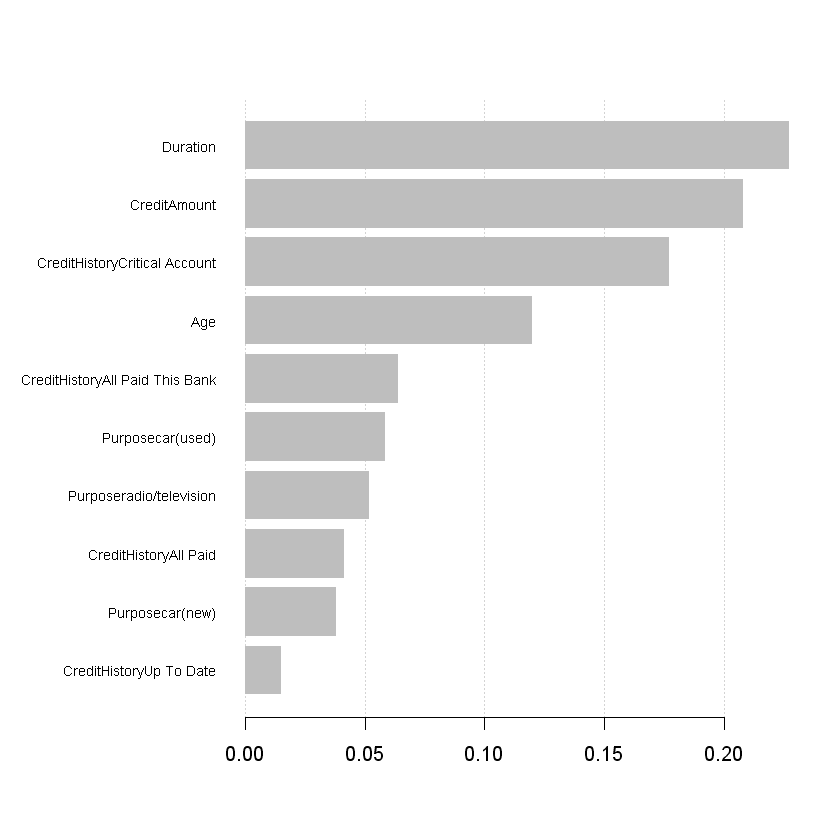

In [67]:
xgb.plot.importance(xgb.importance(creditBoost,
                                  feature_names = colnames(creditX)))

## 6. 랜덤 포레스트(Random Forest)

- 여러 가지 모형들을 갖고 적합을 실행하고 더 강력한 예측을 하는 것
- 예측 능력이 좋지만 추론이나 설명도는 종종 제한이 있다.

In [68]:
install.packages("randomForest")
library(randomForest)

package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\student\AppData\Local\Temp\RtmpiuElyv\downloaded_packages


randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [69]:
creditFormula <- Credit ~ CreditHistory + Purpose + Employment + Duration + Age + CreditAmount - 1

In [70]:
creditX <- build.x(creditFormula, data=credit, contrasts = F)
creditY <- build.y(creditFormula, data=credit)

In [71]:
# 랜덤 포레스트 적합
creditForest <- randomForest(x=creditX, y=creditY)
creditForest


Call:
 randomForest(x = creditX, y = creditY) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 27.5%
Confusion matrix:
     Good Bad class.error
Good  646  54  0.07714286
Bad   221  79  0.73666667

In [72]:
# 응답 행렬

creditY2 <- as.integer(relevel(creditY, ref="Bad")) -1

In [73]:
# 랜덤 포레스트 적합

boostedForest <- xgboost(data=creditX, label=creditY2, max_depth=4,
                        num_parallel_tree = 1000,
                        subsample = 0.5 , colsample_bytree = 0.5,
                        nrounds = 3, objective="binary:logistic")

[1]	train-error:0.283000 
[2]	train-error:0.280000 
[3]	train-error:0.278000 
